#ชื่อ นามสกุล รหัส นศ

# Exam of DEEP LEARNING (ENG39 4206)
## Advanced Topics in Electronics Engineering (539426)
อาจารย์ ดร.มาโนทย์ มาปะโท

ภาคการศึกษาที่ 2 ปีการศึกษา 2567

สาขาวิชาวิศวกรรมอิเล็กทรอนิกส์ มหาวิทยาลัยเทคโนโลยีสุรนารี

Suranaree University of Technology

Programming 2 ชม <br>
สามารถเปิดเอกสาร ที่เตรียมมา (file หรือ กระดาษ)<br>
ให้เปิดไฟล์เอกสารจาก local drive เท่านั้น กรณีเคยเชื่อม Google drive, one drive ให้ปิด sync ตลอดเวลา<br>
ผู้ที่ใช้ colab สามารถเข้าเว็บ google colab เท่านั้น ไม่อนุญาตให้เข้าเว็บใดๆ แม้แต่ e-learning<br>
ผู้ที่ใช้ colab ควรเตรียม Gmail account สำรอง 2-4 account<br>
ผู้ที่ใช้ colab เปิดไฟล์ google colab ทุกไฟล์ที่ต้องการใช้ก่อนเริ่มสอบใน internet browser เดียว <br>
โดยไฟล์ที่เปิดทุกไฟล์ ต้องไม่มีการแชร์ ถ้ามีจะถือว่าทุจริต (จะมีเจ้าหน้าที่เดินตรวจ)<br>
ไม่อนุญาตมือถือ/tablet/ห้ามเปิดโปรแกรมแชท/แชร์ไฟล์ ใดๆ<br>
ส่งไฟล์โดยโหลดเป็น ipynb ส่งเข้า e-learning เมื่อหมดเวลาสอบ<br>
ใช้ notebook ของตนเอง หรือคอมของมหาวิทยาลัย<br>
การทำผิดข้อกำหนด ถือว่าทุจริตในการสอบ<br>

# 2. Image classification and transfer learning **(20 คะแนน)**

# Import section

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import keras
import pandas as pd
from keras.layers import Flatten, Dense
from keras import layers
import os,shutil,pathlib
from keras.utils import image_dataset_from_directory
import random
tf.random.set_seed(42)
from zipfile import ZipFile
from electf4 import make_confusion_matrix, make_circles
# Library 2 ตัวนี้ใช้สำหรับการทำ Transfer Learning
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

## ให้ทำการ download file "flower.zip" และนำไปวางไว้ใน google drive หรือ local drive

[File download link](https://sutoffice365-my.sharepoint.com/:u:/g/personal/163007_office365_sut_ac_th/EfWXn-2o9RtOt1iMnLBMEnkBlr4Hdp1DC20Qf36kHQRopA?e=QvYmuZ)

# 2.1 การนำเข้าข้อมูล **(2 คะแนน)**
* ## จงนำเข้าข้อมูล และ unzip
* ## จัด folder ให้อยู่ในรูป train test
* ## เรียกดูจำนวน file และ จำนวน class

In [2]:
# Code
# loading the temp.zip and creating a zip object 
with ZipFile(r"D:\deep leaning\midterm\flower.zip", 'r') as zObject: 
    # Extract all the contents of zip file in current directory 
    zObject.extractall()

In [3]:
# code เรียกดูจำนวน file และ จำนวน class
class_list = train_dataset = image_dataset_from_directory(r"D:\deep leaning\midterm\flower\train")
print(class_list.class_names)

Found 1400 files belonging to 4 classes.
['daisy', 'rose', 'sunflower', 'tulip']


# 2.2 จงเขียน code เพื่อเลือก class ที่ต้องการ **(1 คะแนน)**
เขียน code เพื่อทำการเลือกชนิดของดอกไม้ โดยให้ลบไฟลเดอร์ที่ไม่ต้องการออก  
โดยให้เหลือข้อมูลรูปภาพต่อไปนี้
* rose
* sunflower
* tulip

In [4]:
#Code function remove
# 2 function นี้ใช้สำหรับลบ folder ที่ไม่ต้องการออกจาก dataset
def remove_folder(path):
    if os.path.exists(path):
        shutil.rmtree(path)
def RemoveSomeClass(classlist,keep,maindatafolder):
    for m in ["test","train","validation"]: # ภายใน folder ที่เก็บ dataset ไว้จะต้องแบ่งออกเป็น 3 โฟลเดอร์ คือ test, train, validation เท่านั้นเพื่อให้สามารถลบ folder ของ class ที่ไม่ต้องการได้ง่าย
        for i in classlist.class_names: 
            if i not in keep: 
                remove_folder(os.path.join(maindatafolder,m,i))
                print("Removed: %s/%s/%s"%(maindatafolder,m,i))
                

In [5]:
# ลบ class ที่ไม่ต้องการออกจาก dataset และแสดงผลรายชื่อ class ที่ถูกลบ ( 2 คะแนน )
RemoveSomeClass(classlist = class_list, # ตัว classlist คือ class ทั้งหมดที่มีใน dataset โดยจะได้มาตอนที่เรียกใช้ image_dataset_from_directory ในขั้นตอนก่อนหน้า
                keep = ['rose', 'sunflower', 'tulip'], # ตัว keep คือ class ที่ต้องการเก็บไว้
                maindatafolder = r"D:\deep leaning\midterm\flower" # ตัว maindatafolder คือ path ที่เก็บ dataset 
                )

Removed: D:\deep leaning\midterm\flower/test/daisy
Removed: D:\deep leaning\midterm\flower/train/daisy
Removed: D:\deep leaning\midterm\flower/validation/daisy


In [6]:
# code ตรวจสอบ file และ จำนวน class ที่เหลือ
class_list = train_dataset = image_dataset_from_directory(r"D:\deep leaning\midterm\flower\train")
print(class_list.class_names)

Found 1099 files belonging to 3 classes.
['rose', 'sunflower', 'tulip']


# 2.3 จงนำเข้าข้อมูล **(1 คะแนน)**
* กำหนดภาพขนาด 180 x180 และทำการ shuffle
* จากนั้นทำการแสดงภาพต้นแบบโดยให้เลือกภาพแบบสุ่ม

In [7]:
#code นำเข้าข้อมูล
# Function นี้ใช้สำหรับนำเข้ารูปภาพเพื่อใช้ในการ train และ วาด Confusion Matrix
def Import_and_Resize(dataset_dir, image_size = 180, batch_size = 32, shuffle_set = True):

  class_list=train_dataset = image_dataset_from_directory(dataset_dir+"/train",
  image_size=(image_size, image_size),batch_size=batch_size,shuffle=shuffle_set)
  #set shuffle=True when train, and change shuffle=False when plot CF matrix

  validation_dataset = image_dataset_from_directory(dataset_dir+"/test",
  image_size=(image_size, image_size),batch_size=batch_size,shuffle=shuffle_set)
  #set shuffle=True when train, and change shuffle=False when plot CF matrix

  test_dataset = image_dataset_from_directory(dataset_dir+"/test",
  image_size=(image_size, image_size),batch_size=batch_size,shuffle=shuffle_set)
  #set shuffle=True when train, and change shuffle=False when plot CF matrix

  print("\nClass name list: %s" %class_list.class_names)
  return train_dataset, validation_dataset, test_dataset, class_list



In [8]:
# code แสดงภาพต้นแบบโดยให้เลือกภาพแบบสุ่ม
def load_and_prep_image(filename, img_shape=180):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  return img

Class: tulip 
Pic name: 8454707381_453b4862eb_m.jpg


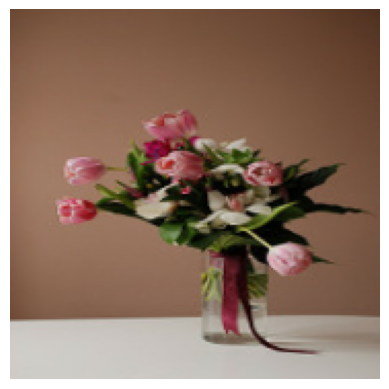

In [11]:
train_dir = r"D:\deep leaning\midterm\flower\train"

listclass = os.listdir(train_dir)
randclass = random.choice(listclass)
listpic = os.listdir(os.path.join(train_dir, randclass))
# listpic=os.listdir("./catdog/train/%s"%randclass)
randpic = random.choice(listpic)

img = load_and_prep_image(os.path.join(train_dir, randclass, randpic))
# img=load_and_prep_image(r"./catdog/train/%s/%s"%(randclass,randpic))
print("Class:",randclass,"\nPic name:",randpic)
img1 = img/255.0
plt.imshow(img1)
plt.axis(False)
plt.show()

In [12]:
# Code นำเข้าข้อมูลแบบ shuffle
train_dataset, validation_dataset, test_dataset, class_list = Import_and_Resize(r"D:\deep leaning\midterm\flower",
                                                                           image_size = 180,
                                                                           shuffle_set = True)

Found 1099 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Found 300 files belonging to 3 classes.

Class name list: ['rose', 'sunflower', 'tulip']


# 1.4 จงสร้าง model โดยใช้วิธี CNN+Transfer learning **(2 คะแนน)**
* รายละเอียด model ให้ใช้ VGG16 model ที่ train จาก "imagenet" เป็น initial weight
* กำหนดจำนวนชั้นตามต้องการ โดยยังไม่ต้องมี data_augmentation  และ ไม่มี dropout
* กำหนดจำนวน dense output ให้ถูกต้อง ถ้าไม่ถูกต้องจะไม่ได้คะแนน
* จากนั้นทำการสร้าง model
* ให้แสดง model.summary()
* กำหนด optimizer = Adam, metrics = accuracy
# >>> กำหนดชื่อ model เป็นรหัสนักศึกษา<<<

In [57]:
# Code VGG16 import
conv_base = VGG16(input_shape = (180,180,3),
                    weights = 'imagenet',
                    include_top = False)
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [14]:
data_augmentation = keras.Sequential(
[ layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2)]
                                    )

In [20]:
# ปิดการ Train ของ Convolutional Base ที่เป็น Pre-trained model ของ VGG16
conv_base.trainable = False
# Build Model
inputs = keras.Input(shape = (180, 180, 3))
# Preprocess
x = keras.applications.vgg16.preprocess_input(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation = "relu")(x)
outputs = layers.Dense(3, activation = "softmax")(x)
# สร้าง Model
B6511340 = keras.Model(inputs = inputs,
                         outputs = outputs)
# เรียกดู model summary
B6511340.summary()
# Compile model
B6511340.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = "Adam",
              metrics = ["accuracy"])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 tf.__operators__.getitem_1   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, 5, 5, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               3277

In [26]:
# Function ใช้สำหรับ plot กราฟของ accuracy และ loss ของ model
def plotloss_acc(train_history, acclim, losslim):
  fig=plt.figure()
  ax1=fig.gca()
  ax1.set_title("Model accuracy and loss")
  ax1.plot(train_history.history['accuracy'], label = "accuracy", c = 'r')
  ax1.plot(train_history.history['val_accuracy'], label = "val_accuracy", c = 'g')
  ax1.set_ylim(acclim)
  ax2=ax1.twinx()
  ax2.plot(train_history.history['loss'], label = "loss", c = 'r', ls = ":")
  ax2.plot(train_history.history['val_loss'], label = "val_loss", c = 'g', ls = "--")
  ax2.set_ylim(losslim)
  ax1.legend(loc = 'upper left')
  ax2.legend(loc = 'lower left')
  plt.show()

# 1.5 จง fit model (epoch = 5)  **(2คะแนน)**
* วาดกราฟแสดง loss และ accuracy
* epoch 5
## ข้อนี้ยังไม่ต้องสนใจ loss

In [22]:
# Code model training/plot
history = B6511340.fit(train_dataset,
                         epochs = 5,
                         validation_data = validation_dataset,
                         batch_size = 8
                         )

Epoch 1/5
35/35 [==============================] - 28s 484ms/step - loss: 5.5783 - accuracy: 0.7516 - val_loss: 1.9287 - val_accuracy: 0.8233
Epoch 2/5
35/35 [==============================] - 8s 215ms/step - loss: 0.1854 - accuracy: 0.9436 - val_loss: 1.1757 - val_accuracy: 0.8167
Epoch 3/5
35/35 [==============================] - 9s 258ms/step - loss: 0.0534 - accuracy: 0.9845 - val_loss: 1.3280 - val_accuracy: 0.8133
Epoch 4/5
35/35 [==============================] - 9s 246ms/step - loss: 0.0222 - accuracy: 0.9955 - val_loss: 1.0328 - val_accuracy: 0.8567
Epoch 5/5
35/35 [==============================] - 14s 408ms/step - loss: 0.0091 - accuracy: 0.9982 - val_loss: 1.1316 - val_accuracy: 0.8433


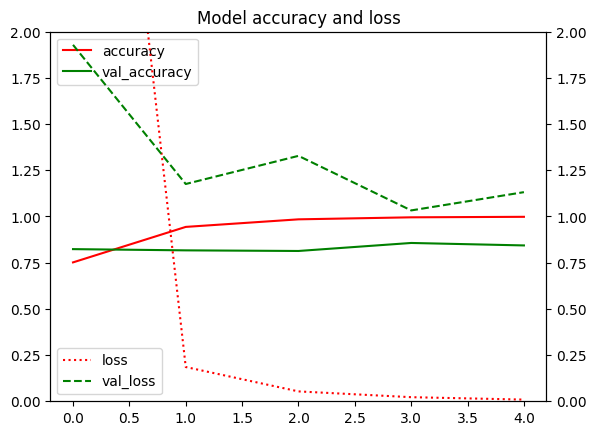

In [28]:
plotloss_acc(history, [0,2], [0, 2])

# 1.6 จง สร้าง model ใหม่ จากนั้น fit model (epoch = 10)  **(5 คะแนน)**
* ให้กำหนด dense ตามต้องการ และ layer สุดท้ายเท่ากับจำนวนชนิดข้อมูล
* สามารถกำหนด augmentation/dropout ตามต้องการ
<!-- * ปรับค่าต่างๆ เพื่อให้ได้ validation Codeloss ต่ำสุด -->
* วาดกราฟแสดง loss และ accuracy

### เกณฑ์การให้คะแนน
| validation Loss  | Score |
|------	|---------- |
|val Loss < 20| 5 |
|val Loss  = 20-29| 4 |
|val Loss  = 30-49 |3 |
|val Loss  = 50-79 | 2 |
|val Loss  = 80 - 99 | 1 |
|val Loss  > 100 | 0 |

In [32]:
# Code create/fit model
# Set seed for reproducibility
tf.random.set_seed(42)

# กำหนด input shape โดยอิงตามขนาดของรูปภาพที่ทำการ Import
inputs = keras.Input(shape = (180, 180, 3))

# Augmentation ข้อมูล
x = data_augmentation(inputs)

# สร้าง Modle อย่าลืมทำการ Normalize
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu")(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Flatten()(x)
x = layers.Dense(20, activation = "relu")(x)
outputs = layers.Dense(3, activation = "softmax")(x)
B6511340_1 = keras.Model(inputs = inputs, 
                         outputs = outputs)

# เรียกดู model summary
B6511340_1.summary()

# Compile model
B6511340_1.compile(loss = keras.losses.sparse_categorical_crossentropy,
                   optimizer = "Adam", 
                   metrics = ["accuracy"]
                   )

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 dropout_2 (Dropout)         (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                           

In [33]:
history1 = B6511340_1.fit(train_dataset,
                      epochs = 10,
                      validation_data = validation_dataset,
                      batch_size = 32
                      )

Epoch 1/10


35/35 [==============================] - 12s 277ms/step - loss: 1.2582 - accuracy: 0.4904 - val_loss: 0.8619 - val_accuracy: 0.5933
Epoch 2/10
35/35 [==============================] - 8s 237ms/step - loss: 0.8034 - accuracy: 0.5951 - val_loss: 0.8336 - val_accuracy: 0.6500
Epoch 3/10
35/35 [==============================] - 9s 243ms/step - loss: 0.7873 - accuracy: 0.5960 - val_loss: 0.8537 - val_accuracy: 0.5867
Epoch 4/10
35/35 [==============================] - 9s 268ms/step - loss: 0.7446 - accuracy: 0.6379 - val_loss: 0.8021 - val_accuracy: 0.6300
Epoch 5/10
35/35 [==============================] - 9s 258ms/step - loss: 0.7295 - accuracy: 0.6479 - val_loss: 0.7264 - val_accuracy: 0.6967
Epoch 6/10
35/35 [==============================] - 11s 305ms/step - loss: 0.7377 - accuracy: 0.6406 - val_loss: 0.7731 - val_accuracy: 0.6733
Epoch 7/10
35/35 [==============================] - 7s 204ms/step - loss: 0.7140 - accuracy: 0.6633 - val_loss: 0.7456 - val_accuracy: 0.6967
Epoch 8/10
35/3

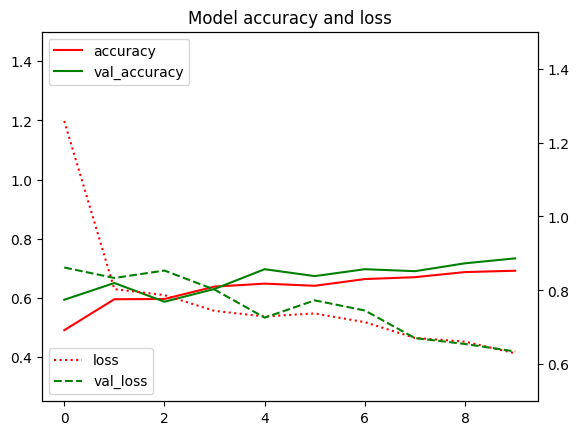

In [36]:
plotloss_acc(history1, [0.25,1.5], [0.5, 1.5])

# 1.7 จงทำ fine tuning และวาดกราฟแสดง loss และ accuracy  **(2 คะแนน)**
* # **epoch <=10**
* # เปิด 1-2 ชั้น
* # ค่า train Accuracy ต้องดีกว่าหรือเท่าเดิม


In [38]:
# Code set trainable layer/fit
len(conv_base.layers)
for layer in conv_base.layers[:17]:
 layer.trainable=False
B6511340_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
optimizer="Adam",
metrics=["accuracy"])
history = B6511340_1.fit(train_dataset,
                                        epochs=10,
                                        validation_data=validation_dataset,)

Epoch 1/10
35/35 [==============================] - 11s 252ms/step - loss: 0.6468 - accuracy: 0.6897 - val_loss: 0.6366 - val_accuracy: 0.7367
Epoch 2/10
35/35 [==============================] - 9s 265ms/step - loss: 0.6030 - accuracy: 0.7243 - val_loss: 0.6438 - val_accuracy: 0.7167
Epoch 3/10
35/35 [==============================] - 9s 262ms/step - loss: 0.6003 - accuracy: 0.7197 - val_loss: 0.6216 - val_accuracy: 0.7233
Epoch 4/10
35/35 [==============================] - 9s 263ms/step - loss: 0.6082 - accuracy: 0.7161 - val_loss: 0.6629 - val_accuracy: 0.7200
Epoch 5/10
35/35 [==============================] - 9s 253ms/step - loss: 0.6055 - accuracy: 0.7197 - val_loss: 0.6304 - val_accuracy: 0.7233
Epoch 6/10
35/35 [==============================] - 11s 303ms/step - loss: 0.5458 - accuracy: 0.7598 - val_loss: 0.6217 - val_accuracy: 0.6967
Epoch 7/10
35/35 [==============================] - 10s 284ms/step - loss: 0.5499 - accuracy: 0.7279 - val_loss: 0.5989 - val_accuracy: 0.7400
Epo

#1.8 จง save และ load model **(1 คะแนน)**

In [39]:
# Code save/load
B6511340_1.save("flower.keras")

#1.9 จงทดสอบทำนายภาพคลาสละ 1 ภาพ **(2 คะแนน)**

In [48]:

# สร้างตัวแปร class_names เพื่อเก็บชื่อ class ที่ใช้ในการทำนาย
class_names=['rose', 'sunflower', 'tulip']
# Function สำหรับทำนายรูปภาพแบบ Multiclass classification
def combo_pred(model, filename, class_names, img_shape = 180):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[tf.argmax(pred[0])]
  print(pred)
  print(tf.argmax(pred[0]))
  img1 = img/255.
  plt.imshow(img1)
  plt.title("Prediction: %s @ %.4f "%(pred_class,pred[0][tf.argmax(pred[0])]))
  plt.axis(False);
  plt.show()
  return pred

1/1 [==============================] - 0s 140ms/step
[[0.4958826  0.14138745 0.36272994]]
tf.Tensor(0, shape=(), dtype=int64)


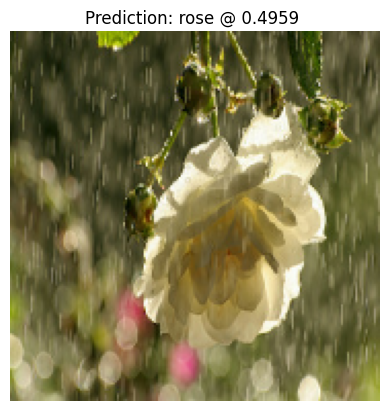

array([[0.4958826 , 0.14138745, 0.36272994]], dtype=float32)

In [49]:
# Code predict
combo_pred(B6511340_1,r'D:\deep leaning\midterm\flower\test\rose\3556123230_936bf084a5_n.jpg',class_list.class_names)

1/1 [==============================] - 0s 30ms/step
[[0.00789621 0.9471438  0.04496001]]
tf.Tensor(1, shape=(), dtype=int64)


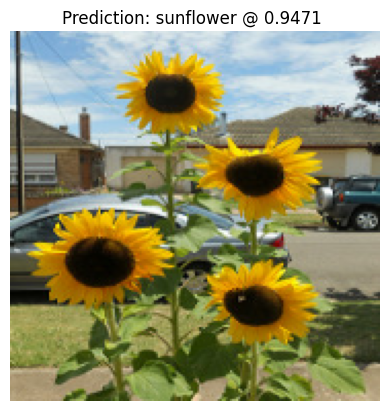

array([[0.00789621, 0.9471438 , 0.04496001]], dtype=float32)

In [50]:
# Code predict
combo_pred(B6511340_1,r'D:\deep leaning\midterm\flower\test\sunflower\5293283002_9b17f085f7_m.jpg',class_list.class_names)

1/1 [==============================] - 0s 32ms/step
[[0.41871786 0.00993875 0.5713434 ]]
tf.Tensor(2, shape=(), dtype=int64)


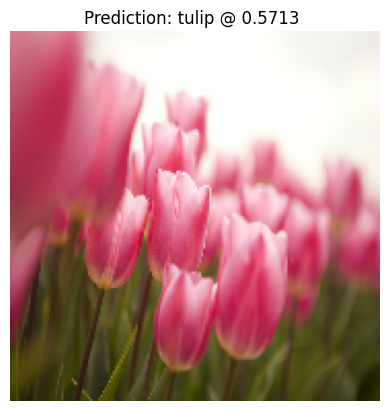

array([[0.41871786, 0.00993875, 0.5713434 ]], dtype=float32)

In [52]:
# Code predict
combo_pred(B6511340_1,r'D:\deep leaning\midterm\flower\test\tulip\4590702749_e1df8e0c1b.jpg',class_list.class_names)

# 1.10 จงวาด Confusion matrix  **(2 คะแนน)**
## **ใช้ train dataset**
# **ตัวอย่าง** <br>

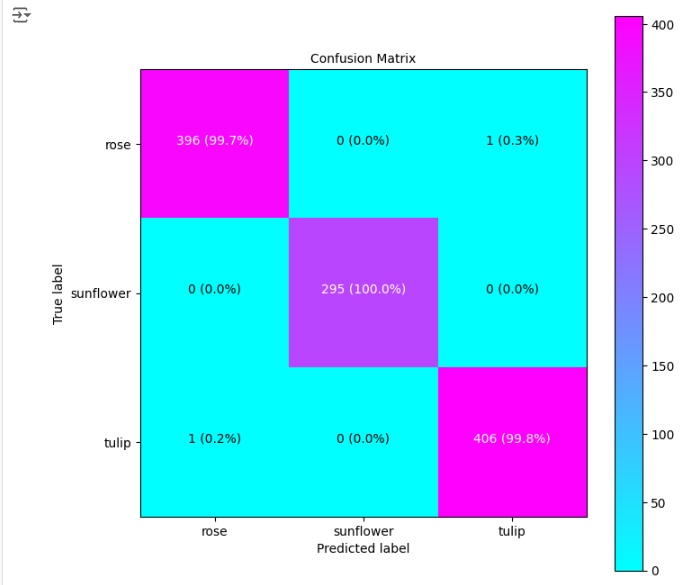

In [53]:
# Code
train_dataset,validation_dataset,test_dataset,class_list = Import_and_Resize(r"D:\deep leaning\midterm\flower",
                                                                           image_size = 180,
                                                                           shuffle_set = False)


Found 1099 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Found 300 files belonging to 3 classes.

Class name list: ['rose', 'sunflower', 'tulip']


In [54]:
def built_dataforCFmat(model,dataset):
 y_probs = model.predict(dataset)
 y_preds = y_probs.argmax(axis=1)
 y_train = np.concatenate([y for x, y in dataset], axis=0)
 return y_preds, y_train

10/10 [==============================] - 0s 24ms/step


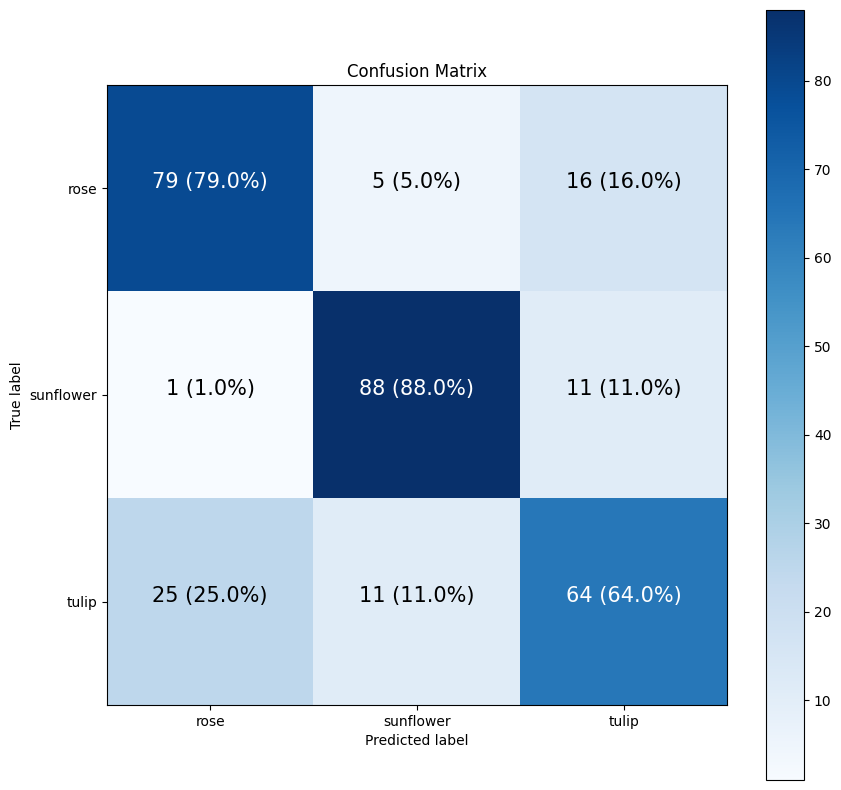

In [55]:
y_pred, y_train = built_dataforCFmat(B6511340_1,test_dataset)
make_confusion_matrix(y_train, y_pred, class_list.class_names)